In [72]:
import tweepy
import webbrowser
import time
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [73]:
consumer_key = 'XcHoDARQgtfQ4u57uLXiKWXFH'
consumer_secret = 'ummL8WhMjEICkczTvRyVWyHncn17gRKYYVg58RqrWghEBL8vUf'
access_token = '1314430636422311942-kEmUXJTRO1NL7grgrN20sznBuS8BRc'
access_secret = 'wIu2vHMNqkd6niNjJ2y9Rio1a0WImkfK1Gu4D3Xux9hne'

client = tweepy.Client("AAAAAAAAAAAAAAAAAAAAAHMfVgEAAAAA%2FCwNIcsofnoS1tv190IPg%2FULFe4%3DpEc3rXBmArOwpR32D02dmUXI5UYP2SKy3G6ks4WZWdmBONetXl")


In [74]:
auth = tweepy.AppAuthHandler("XcHoDARQgtfQ4u57uLXiKWXFH", "ummL8WhMjEICkczTvRyVWyHncn17gRKYYVg58RqrWghEBL8vUf")
api = tweepy.API(auth)

In [111]:
posts = tweepy.Cursor(api.search_tweets,  "solana,  -filter:retweets", lang='en', result_type='recent', count=25).items(10)

string_array = []
i=1
for status in posts:
    string_array.append(str(i) + '.' + status.text)
    i=i+1

In [112]:
string_array 

['1.@Whalebe_ @solscanofficial @solana Thanks for giving us such a great opportunity. I am supporting it. always succes… https://t.co/it3kDCShiF',
 '2.@Whalebe_ I believe this is a faithful project.The projector has a lot of attractions so hopefully the project will… https://t.co/st6O8Ux1Yq',
 '3.This is an Awesome project 🔥\nI believe will be the next game changer in the Solana Blockchain🌕… https://t.co/dhnFrb1CCf',
 '4.@chainlink @PhantasiaSports @solana @Vishv_Space @0x0kumar @SOLBigBrain @SOLbuckets Vishv is an NFT space game bein… https://t.co/ihm25mwszb',
 '5.@SOLSVEN_ Awesome project.. I am very impressed with this project. The level of popularity and performance of this… https://t.co/ZREIS9Yl2G',
 '6.@KhabyLameToken Nice project \nI love the community,I believe this project will go a long way and continue to progre… https://t.co/7NJTQ4yX5O',
 '7.@jackie_token @EyeOfJackieChan @cryptohierarchy @solminter @solana This project looks very interesting. I am intere… https://t.co/kk4U

In [113]:
#put these into a dataframe
tweets_df = pd.DataFrame(string_array, columns=['Tweets'])
tweets_df

,Tweets
0,1.@Whalebe_ @solscanofficial @solana Thanks fo...
1,2.@Whalebe_ I believe this is a faithful proje...
2,3.This is an Awesome project 🔥\nI believe will...
3,4.@chainlink @PhantasiaSports @solana @Vishv_S...
4,5.@SOLSVEN_ Awesome project.. I am very impres...
5,6.@KhabyLameToken Nice project \nI love the co...
6,7.@jackie_token @EyeOfJackieChan @cryptohierar...
7,"8.@SuperSolow @cardano_whale @solana Siri, def..."
8,9.@high_fades Eth is truly Defi. Solana for ex...
9,10.@xsinanaslan 🎈Balloons on the Sea🎈\nA uniqu...


In [114]:
#clean the text, create a function to remove @mentions, #hashtags, retweetsm and any links
def clean_text(text):
    text= re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
    text = re.sub(r'#','', text) #removes the # symbol
    text = re.sub(r'RT[\s]+','', text) #removes RT
    text = re.sub(r'https?:\/\/\S+','', text) #removes hyperlink
    
    return text

tweets_df['Tweets'] = tweets_df['Tweets'].apply(clean_text)
tweets_df.head(10)

,Tweets
0,1._ Thanks for giving us such a great opport...
1,2._ I believe this is a faithful project.The p...
2,3.This is an Awesome project 🔥\nI believe will...
3,4. _Space Vishv is an NFT space game bein…
4,5._ Awesome project.. I am very impressed with...
5,"6. Nice project \nI love the community,I belie..."
6,7._token This project looks very interesti...
7,"8. _whale Siri, define billionaire ponzischeme"
8,9._fades Eth is truly Defi. Solana for example...
9,10. 🎈Balloons on the Sea🎈\nA unique collection...


In [115]:
#create a function to get subjectivity and polarities
#subjectivity - how opinionated the text is

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
                    
#create a function to get polarity, how positive or negative the text is
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns
tweets_df['Subjectivity'] = tweets_df['Tweets'].apply(get_subjectivity)
tweets_df['Polarity'] = tweets_df['Tweets'].apply(get_polarity)

#show df
tweets_df.head(10)

,Tweets,Subjectivity,Polarity
0,1._ Thanks for giving us such a great opport...,0.425000,0.3125
1,2._ I believe this is a faithful project.The p...,0.000000,0.0000
2,3.This is an Awesome project 🔥\nI believe will...,0.466667,0.2000
3,4. _Space Vishv is an NFT space game bein…,0.400000,-0.4000
4,5._ Awesome project.. I am very impressed with...,1.000000,1.0000
5,"6. Nice project \nI love the community,I belie...",0.666667,0.3500
6,7._token This project looks very interesti...,0.650000,0.6500
7,"8. _whale Siri, define billionaire ponzischeme",0.000000,0.0000
8,9._fades Eth is truly Defi. Solana for example...,0.600000,0.5000
9,10. 🎈Balloons on the Sea🎈\nA unique collection...,0.975000,0.4875


In [116]:
#create a function that tells you whether the score is positive or negative 
#use polarity to get the analysis
def get_analysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
#create new column for analysis    
tweets_df['Analysis'] = tweets_df['Polarity'].apply(get_analysis)

#show
tweets_df.head(10)



,Tweets,Subjectivity,Polarity,Analysis
0,1._ Thanks for giving us such a great opport...,0.425000,0.3125,Positive
1,2._ I believe this is a faithful project.The p...,0.000000,0.0000,Neutral
2,3.This is an Awesome project 🔥\nI believe will...,0.466667,0.2000,Positive
3,4. _Space Vishv is an NFT space game bein…,0.400000,-0.4000,Negative
4,5._ Awesome project.. I am very impressed with...,1.000000,1.0000,Positive
5,"6. Nice project \nI love the community,I belie...",0.666667,0.3500,Positive
6,7._token This project looks very interesti...,0.650000,0.6500,Positive
7,"8. _whale Siri, define billionaire ponzischeme",0.000000,0.0000,Neutral
8,9._fades Eth is truly Defi. Solana for example...,0.600000,0.5000,Positive
9,10. 🎈Balloons on the Sea🎈\nA unique collection...,0.975000,0.4875,Positive


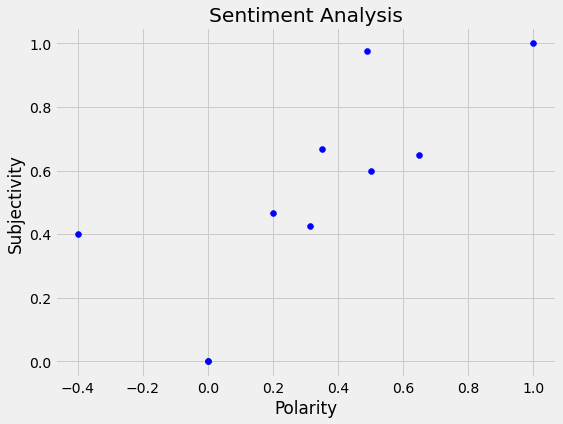

In [117]:
#plot the polarity and subjectivity to visualize tweet sentiment
plt.figure(figsize=(8,6))
for i in range(0, tweets_df.shape[0]):
    plt.scatter(tweets_df['Polarity'][i], tweets_df['Subjectivity'][i], color='blue' )
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [118]:
tweets_df.shape[0]

10

In [119]:
#import tone analysis components from IBM watson
import os
import json
from pandas import json_normalize
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [120]:
#authenticate IBM watson api connection & keys 
tone_api = 'sSmwPiU_pNoL7CbYGGmr4ZbsSiJx8ams6bu9a-1rmstl'


authenticator = IAMAuthenticator(tone_api)
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)
tone_analyzer.set_service_url('https://api.au-syd.tone-analyzer.watson.cloud.ibm.com/instances/85c20273-70b0-4277-b776-694e7146a612')



In [121]:
#create a document that can be run as a single string through IBM tone_analyzer
full_text = " ".join( [tweets for tweets in tweets_df["Tweets"]] )
print(full_text)


1._   Thanks for giving us such a great opportunity. I am supporting it. always succes…  2._ I believe this is a faithful project.The projector has a lot of attractions so hopefully the project will…  3.This is an Awesome project 🔥
I believe will be the next game changer in the Solana Blockchain🌕…  4.   _Space    Vishv is an NFT space game bein…  5._ Awesome project.. I am very impressed with this project. The level of popularity and performance of this…  6. Nice project 
I love the community,I believe this project will go a long way and continue to progre…  7._token     This project looks very interesting. I am intere…  8. _whale  Siri, define billionaire ponzischeme 9._fades Eth is truly Defi. Solana for example is semi centralized. I love both, but I think bitching about ETH…  10. 🎈Balloons on the Sea🎈
A unique collection of 11 lovingly handcrafted Pixel-Art Pieces existing solely… 


In [122]:
# Define the text you want to analyze
text = full_text
# Analyze the text's tone with the 'tone()' method.
tone_analysis = tone_analyzer.tone(
    {"text": text},
    content_type="application/json",
    content_language="en",
    accept_language="en",
).get_result()
# Display tone analysis results
print(json.dumps(tone_analysis, indent=10))
    


{
          "document_tone": {
                    "tones": [
                              {
                                        "score": 0.668542,
                                        "tone_id": "sadness",
                                        "tone_name": "Sadness"
                              },
                              {
                                        "score": 0.67282,
                                        "tone_id": "joy",
                                        "tone_name": "Joy"
                              }
                    ]
          },
          "sentences_tone": [
                    {
                              "sentence_id": 0,
                              "text": "1._   Thanks for giving us such a great opportunity.",
                              "tones": [
                                        {
                                                  "score": 0.634367,
                                                  "tone_id": "joy",
 

In [123]:
# Document Tones
doc_tone_df = json_normalize(data=tone_analysis["document_tone"], record_path=["tones"])
doc_tone_df.head(10)


,score,tone_id,tone_name
0,0.668542,sadness,Sadness
1,0.672820,joy,Joy


In [124]:
# Sentences Tones
sentences_tone_df = json_normalize(
    data=tone_analysis["sentences_tone"],
    record_path=["tones"],
    meta=["sentence_id", "text"],
)
sentences_tone_df.head(20)

,score,tone_id,tone_name,sentence_id,text
0,0.634367,joy,Joy,0,1._ Thanks for giving us such a great opport...
1,0.849043,joy,Joy,2,always succes… 2._ I believe this is a faithf...
2,0.772739,joy,Joy,3,I believe will be the next game changer in the...
3,0.660730,joy,Joy,4,I am very impressed with this project.
4,0.921250,confident,Confident,4,I am very impressed with this project.
5,0.805457,joy,Joy,5,The level of popularity and performance of thi...
6,0.858544,joy,Joy,6,"I love the community,I believe this project wi..."
7,0.727798,confident,Confident,7,"I am intere… 8. _whale Siri, define billiona..."
8,0.781949,analytical,Analytical,7,"I am intere… 8. _whale Siri, define billiona..."
9,0.989022,analytical,Analytical,8,Solana for example is semi centralized.


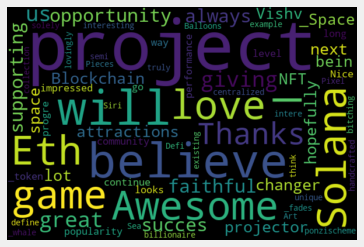

In [125]:
#plot Word Cloud
all_words = ' '.join( [twts for twts in tweets_df['Tweets']] )
word_cloud = WordCloud(width = 600, height=400, random_state = 2, max_font_size = 119).generate(all_words)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()